# A. Importing Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scipyio
import seaborn as sns
import pandas as pd
from google.colab import drive
import os

# B. Reading Dataset

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
gestures_label = {
	 'Thumb_UP' : 0,
	 'Index' : 1,
	 'Right_Angle' : 2,
	 'Peace' : 3,
	 'Index_Little' : 4,
	 'Thumb_Little' : 5,
	 'Hand_Close' : 6,
	 'Hand_Open' : 7,
	 'Wrist_Extension' : 8,
	 'Wrist_Flexion' : 9,
	 'Ulner_Deviation' : 10,
	 'Radial_Deviation' : 11
}

gestures = ['Thumb_UP', 'Index_Little', 'Right_Angle', 'Peace', 'Index', 'Thumb_Little', 'Hand_Close', 'Hand_Open',
	 'Wrist_Extension', 'Wrist_Flexion', 'Ulner_Deviation', 'Radial_Deviation'
]

In [5]:
persons = ["Arifa", "Arnob", "Ashis", "Bayezid", "Bushra", "Choity", "Choity_new", "Eftekhar",
           "Fahim", "Humaid", "Humayun", "Johir", "Joy", "Mamun", "Noman", "Piyus", "Sazzad",
           "Shafi", "Shourav", "Tamim", "Wadud"]

In [6]:
def get_gesture_label(filename, gestures, gestures_label):
  for gesture in gestures:
    if(filename.find(gesture)!=-1):
      #print(filename, gesture, gestures_label[gesture])
      return gestures_label[gesture]

In [7]:
def read_dataset(root_datapath, persons, orientation):
  x = []
  y = []
  for person in persons:
    count = 0
    person_folder_path = root_datapath + "/" + person + "/" + orientation
    for root, dirs, files in os.walk(person_folder_path, topdown=False):
      for file in files:
        if file.find('Copy')!=-1:
          continue
        else:
          count = count + 1
          matdata = scipyio.loadmat(os.path.join(person_folder_path, file))
          x.append(matdata['value'])
          #print(file, get_gesture_label(file, gestures, gestures_label))
          y.append(get_gesture_label(file, gestures, gestures_label))
    print(person + f" : {count}")

  x = np.array(x)
  y = np.array(y)
  return x, y

In [8]:
filepath = "gdrive/My Drive/Forearm Invariant Data/"

In [19]:
#rest_x, rest_y = read_dataset(filepath, persons, "Rest")
#pronation_x, pronation_y = read_dataset(filepath, persons, "Pronation")
supination_x, supination_y = read_dataset(filepath, persons, "Supination")

Arifa : 60
Arnob : 60
Ashis : 60
Bayezid : 60
Bushra : 60
Choity : 60
Choity_new : 60
Eftekhar : 60
Fahim : 60
Humaid : 60
Humayun : 60
Johir : 60
Joy : 60
Mamun : 60
Noman : 60
Piyus : 60
Sazzad : 60
Shafi : 60
Shourav : 60
Tamim : 60
Wadud : 60


In [20]:
print(rest_x.shape, rest_y.shape)
print(supination_x.shape, supination_y.shape)
print(pronation_x.shape, pronation_y.shape)

(1260, 8, 8000) (1260,)
(1260, 8, 8000) (1260,)
(1260, 8, 8000) (1260,)


In [21]:
rest_x = rest_x/np.max(rest_x)
#supination_x = supination_x/np.max(supination_x)
#pronation_x = pronation_x/np.max(pronation_x)

# C. Model Training (ANN)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    rest_x,rest_y,
    test_size = .2, shuffle=True, random_state=0
)

In [ ]:
x_train.shape

(816, 8, 8000)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
ann_model = models.Sequential([
    layers.Flatten(input_shape=(8, 8000)),
    layers.Dense(3000, activation='relu'),
    layers.Dropout(.2),
    layers.Dense(2000, activation='relu'),
    layers.Dropout(.2),
    layers.Dense(1000, activation='relu'),
    layers.Dropout(.2),
    layers.Dense(12, activation='sigmoid'),
])

In [ ]:
ann_model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = ann_model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
26/26 [==============================] - 24s 860ms/step - loss: 2.4867 - accuracy: 0.0931 - val_loss: 2.4843 - val_accuracy: 0.0833
Epoch 2/15
26/26 [==============================] - 21s 803ms/step - loss: 2.4731 - accuracy: 0.1042 - val_loss: 2.4831 - val_accuracy: 0.0735
Epoch 3/15
26/26 [==============================] - 22s 838ms/step - loss: 2.4596 - accuracy: 0.1642 - val_loss: 2.4817 - val_accuracy: 0.0735
Epoch 4/15
26/26 [==============================] - 23s 871ms/step - loss: 2.4428 - accuracy: 0.2267 - val_loss: 2.4807 - val_accuracy: 0.0686
Epoch 5/15
26/26 [==============================] - 22s 837ms/step - loss: 2.4295 - accuracy: 0.2267 - val_loss: 2.4797 - val_accuracy: 0.0735
Epoch 6/15
26/26 [==============================] - 22s 868ms/step - loss: 2.4134 - accuracy: 0.2488 - val_loss: 2.4787 - val_accuracy: 0.0686
Epoch 7/15
26/26 [==============================] - 21s 807ms/step - loss: 2.4022 - accuracy: 0.2635 - val_loss: 2.4778 - val_accuracy: 0.0686

In [ ]:
validation_history = ann_model.evaluate(x_test, y_test)

7/7 [==============================] - 1s 191ms/step - loss: 2.4700 - accuracy: 0.0833


In [ ]:
ann_model.evaluate(pronation_x, pronation_y)

33/33 [==============================] - 8s 233ms/step - loss: 2.4689 - accuracy: 0.0891


[2.468853712081909, 0.08914728462696075]

In [ ]:
ann_model.evaluate(supination_x, supination_y)

32/32 [==============================] - 7s 206ms/step - loss: 2.4606 - accuracy: 0.1010


[2.460561513900757, 0.10098039358854294]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann_model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report : ")
print(classification_report(y_test, y_pred_classes))

7/7 [==============================] - 1s 194ms/step
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.50      0.06      0.11        16
           2       0.14      0.08      0.10        13
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00        15
           8       0.09      0.94      0.16        16
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00        17

    accuracy                           0.08       204
   macro avg       0.06      0.09      0.03       204
weighted avg       0.06      0.08      0.03       204



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


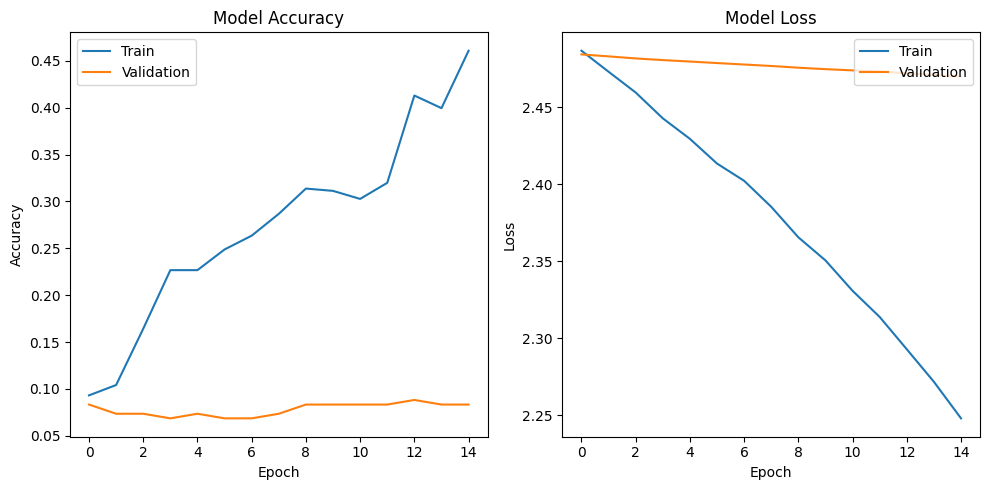

In [ ]:
# Plotting model accuracy and loss
def plot_history(history):
    plt.figure(figsize=(10, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history)